In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [47]:
path_to_co2_twater = 'co2/CO2_all.csv'
path_to_auto_ch4_fluxes = 'auto_fluxes/auto_fluxes_all.csv'
path_to_bucket_fluxes = 'bucket_fluxes/bucket_fluxes_all.csv'
path_to_YK1 = 'meteo/US-YK1_HH_201909281700_202212312330.csv'
path_to_YK2 = 'meteo/US-YK2_HH_201907152200_202409010000.csv'
#path_to_auto_do = 'do/DO_all.csv'

In [48]:
#gpp in umol/m2/s
yk1_fluxes = pd.read_csv(path_to_YK1, parse_dates=['TIMESTAMP_START', 'TIMESTAMP_END'])[['TIMESTAMP_START', 'TIMESTAMP_END', 'GPP', 'GPP_F']]
yk2_fluxes = pd.read_csv(path_to_YK2, parse_dates=['TIMESTAMP_START', 'TIMESTAMP_END'])[['TIMESTAMP_START', 'TIMESTAMP_END', 'GPP', 'GPP_F']]

yk1_fluxes = yk1_fluxes.replace(-9999, np.nan)
yk2_fluxes = yk2_fluxes.replace(-9999, np.nan)

yk1_fluxes['Month'] = yk1_fluxes['TIMESTAMP_START'].dt.month
yk1_fluxes['Year'] = yk1_fluxes['TIMESTAMP_START'].dt.year
yk1_fluxes['time_integ_s'] = (yk1_fluxes['TIMESTAMP_END'] - yk1_fluxes['TIMESTAMP_START']).dt.total_seconds()

yk2_fluxes['Month'] = yk2_fluxes['TIMESTAMP_START'].dt.month
yk2_fluxes['Year'] = yk2_fluxes['TIMESTAMP_START'].dt.year
yk2_fluxes['time_integ_s'] = (yk2_fluxes['TIMESTAMP_END'] - yk2_fluxes['TIMESTAMP_START']).dt.total_seconds()

In [50]:
yk1_fluxes['GPP_F'] = yk1_fluxes['GPP_F'] * yk1_fluxes['time_integ_s']
yk2_fluxes['GPP_F'] = yk2_fluxes['GPP_F'] * yk2_fluxes['time_integ_s']

yk1_fluxes['GPP'] = yk1_fluxes['GPP'] * yk1_fluxes['time_integ_s']
yk2_fluxes['GPP'] = yk2_fluxes['GPP'] * yk2_fluxes['time_integ_s']

In [51]:
yk1_monthly = yk1_fluxes[['Year', 'Month', 'GPP_F', 'GPP']].groupby(by=['Year', 'Month']).sum().reset_index()
yk2_monthly = yk2_fluxes[['Year', 'Month', 'GPP_F', 'GPP']].groupby(by=['Year', 'Month']).sum().reset_index()

yk1_monthly['dt'] = pd.to_datetime(yk1_monthly[['Year', 'Month']].assign(day=1))
yk2_monthly['dt'] = pd.to_datetime(yk2_monthly[['Year', 'Month']].assign(day=1))

yk1_monthly['pond'] = 'burned'
yk2_monthly['pond'] = 'unburned'

<Axes: xlabel='dt', ylabel='GPP_F'>

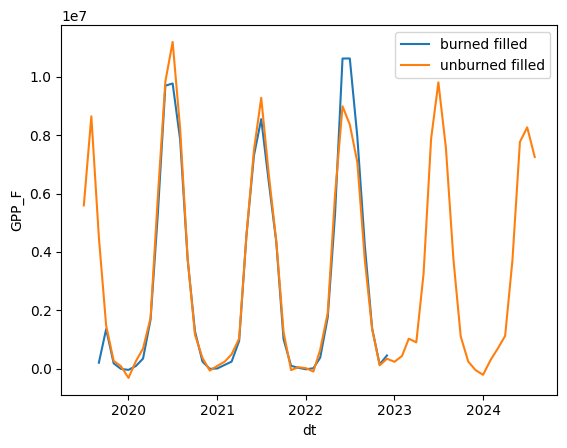

In [54]:
sns.lineplot(data=yk1_monthly, x='dt', y='GPP_F', label='burned filled')
sns.lineplot(data=yk2_monthly, x='dt', y='GPP_F', label='unburned filled')

In [ ]:
terrestrial_fluxes_all = pd.concat([yk1_monthly, yk2_monthly])